In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df['target'] = iris.target

In [8]:
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]

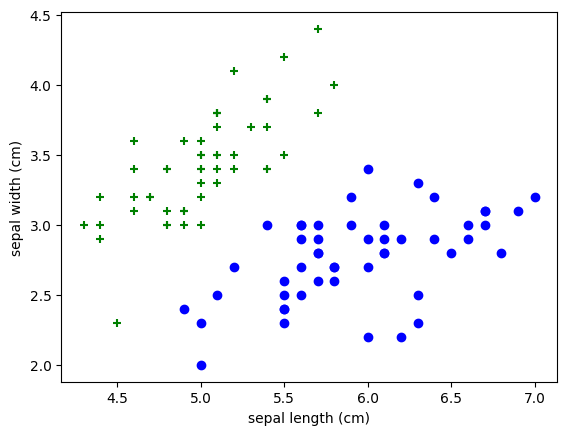

In [10]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue')

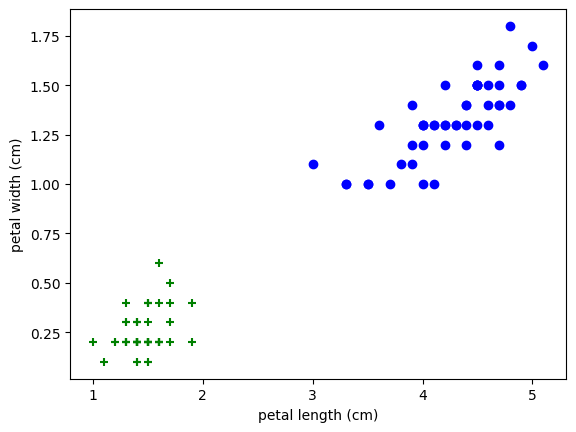

In [11]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop(columns=['target', 'flower_name'])
y = df['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [15]:
from sklearn.svm import SVC
model = SVC()

In [16]:
model.fit(X_train, y_train)

SVC()

In [17]:
model.score(X_test, y_test)

1.0

In [18]:
model.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [19]:
import numpy as np
cols = X_test.columns
new_df = pd.DataFrame(np.hstack((X_test, model.predict(X_test).reshape(-1, 1))))

In [20]:
cols = list(cols)
cols.append("expected target")
print(cols)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'expected target']


In [21]:
new_df.columns = cols

In [22]:
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),expected target
0,6.1,2.8,4.7,1.2,1.0
1,5.7,3.8,1.7,0.3,0.0
2,7.7,2.6,6.9,2.3,2.0
3,6.0,2.9,4.5,1.5,1.0
4,6.8,2.8,4.8,1.4,1.0
5,5.4,3.4,1.5,0.4,0.0
6,5.6,2.9,3.6,1.3,1.0
7,6.9,3.1,5.1,2.3,2.0
8,6.2,2.2,4.5,1.5,1.0
9,5.8,2.7,3.9,1.2,1.0


In [23]:
new_df['Expected flower_name'] = new_df['expected target'].apply(lambda x : iris.target_names[int(x)])

In [24]:
# Expected Data Frame to target 
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),expected target,Expected flower_name
0,6.1,2.8,4.7,1.2,1.0,versicolor
1,5.7,3.8,1.7,0.3,0.0,setosa
2,7.7,2.6,6.9,2.3,2.0,virginica
3,6.0,2.9,4.5,1.5,1.0,versicolor
4,6.8,2.8,4.8,1.4,1.0,versicolor
5,5.4,3.4,1.5,0.4,0.0,setosa
6,5.6,2.9,3.6,1.3,1.0,versicolor
7,6.9,3.1,5.1,2.3,2.0,virginica
8,6.2,2.2,4.5,1.5,1.0,versicolor
9,5.8,2.7,3.9,1.2,1.0,versicolor


In [25]:
new_df['Real Target'] = y_test.values

In [26]:
new_df['Real flower name'] = new_df['Real Target'].apply(lambda x : iris.target_names[int(x)])

In [27]:
new_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),expected target,Expected flower_name,Real Target,Real flower name
0,6.1,2.8,4.7,1.2,1.0,versicolor,1,versicolor
1,5.7,3.8,1.7,0.3,0.0,setosa,0,setosa
2,7.7,2.6,6.9,2.3,2.0,virginica,2,virginica
3,6.0,2.9,4.5,1.5,1.0,versicolor,1,versicolor
4,6.8,2.8,4.8,1.4,1.0,versicolor,1,versicolor
